# TASK 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

Problem Statement:

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

# Solution:

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading data
data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#checking for null values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data = data.drop_duplicates()

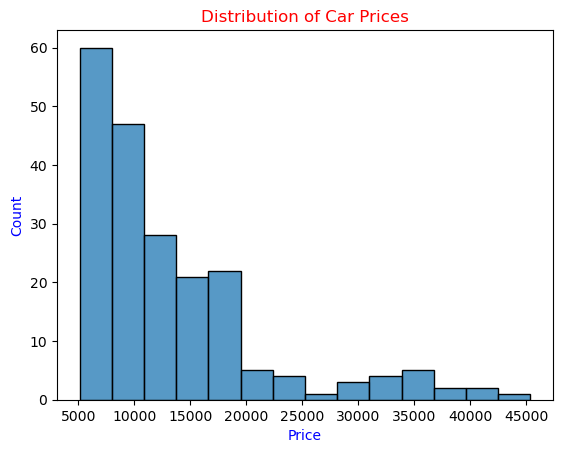

In [8]:
sns.histplot(data['price'])
plt.title('Distribution of Car Prices', color='red')
plt.xlabel('Price', color='blue')
plt.ylabel('Count', color='blue')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

In [9]:
data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


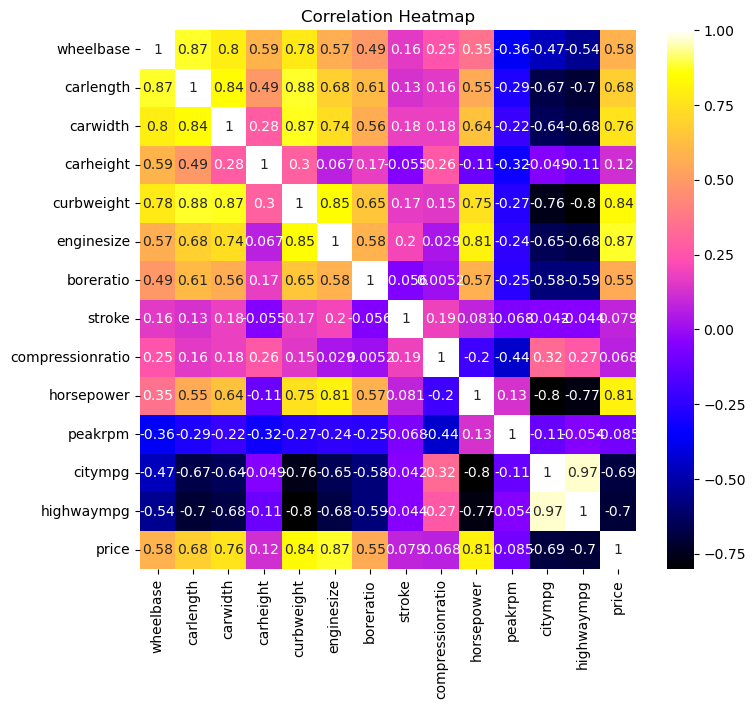

In [10]:
numeric_features = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
                    'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
correlation_mat = data[numeric_features].corr()
plt.figure(figsize = (8,7))
sns.heatmap(correlation_mat, annot = True, cmap = 'gnuplot2')
plt.title('Correlation Heatmap', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.show()

<AxesSubplot:xlabel='wheelbase', ylabel='carlength'>

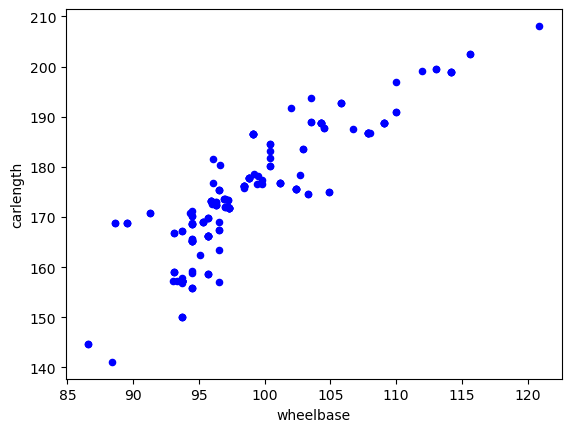

In [11]:
#scatter plot
data.plot.scatter('wheelbase','carlength', color='blue')

<AxesSubplot:xlabel='wheelbase', ylabel='carlength'>

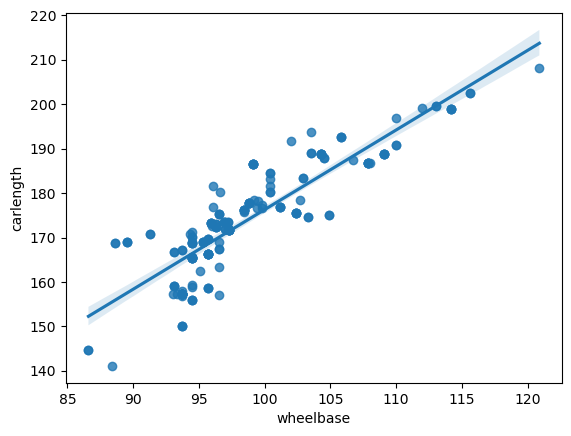

In [12]:
#regression plot
sns.regplot(x='wheelbase',y='carlength',data=data)

In [13]:
# Preprocessing data
feature_calls = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase',
                 'carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem',
                 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
target_call = 'price'
x = data[feature_calls]
y = data[target_call]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for call in x.columns:
    if x[call].dtype == 'object':
        x[call] = label_encoder.fit_transform(x[call])

In [15]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 35)

In [16]:
# Fitting the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# Evaluation
preds = model.predict(x_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3360.138448116176


In [18]:
# Prediction
new_car_data = [[2, 'diesel','std','four','convertible','fwd','front', 100, 120, 68.0, 57.5, 2900, 'ohc','four',115,
                'mpfi', 3.50, 2.80, 8.5, 110, 5500, 30, 38]]
new_car_df = pd.DataFrame(new_car_data, columns = feature_calls)
new_car_encoded = pd.get_dummies(new_car_df, drop_first = True)
new_car_encoded = new_car_encoded.reindex(columns = x_train.columns, fill_value = 0)
predicted_price = model.predict(new_car_encoded)
print("Predicted Price:", predicted_price)

Predicted Price: [16619.29870092]


In [19]:
import statsmodels.formula.api as smapi

In [20]:
# Simple linear regression model
model1=smapi.ols(formula='wheelbase~carlength',data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              wheelbase   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     660.5
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           9.70e-66
Time:                        23:48:42   Log-Likelihood:                -510.04
No. Observations:                 205   AIC:                             1024.
Df Residuals:                     203   BIC:                             1031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4580      2.898      8.439      0.0

In [21]:
pred=model1.predict()
pred

array([ 96.51576586,  96.51576586,  97.54028328,  99.84544748,
        99.84544748, 100.14426506, 106.71825185, 106.71825185,
       106.71825185, 100.52845909,  99.93082393,  99.93082393,
        99.93082393,  99.93082393, 105.13878749, 105.13878749,
       107.18782234, 108.55384556,  84.69112728,  91.00898472,
        92.24694327,  91.60661988,  91.60661988,  91.60661988,
        91.60661988,  91.60661988,  91.60661988,  91.60661988,
        98.99168296,  98.3940478 ,  86.18521519,  86.18521519,
        88.49037939,  88.49037939,  88.49037939,  94.21060166,
        91.52124343,  95.96081892,  95.96081892,  99.33318877,
        99.33318877,  99.33318877,  96.64383054,  97.32684215,
        91.00898472,  91.00898472,  98.13791844, 109.66373944,
       109.66373944, 106.29136959,  92.37500795,  92.37500795,
        92.37500795,  95.66200134,  95.66200134,  96.60114231,
        96.60114231,  96.60114231,  96.60114231, 100.35770619,
       100.35770619, 100.35770619, 100.35770619, 100.35

In [22]:
data['prediction']=pred
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,prediction
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,96.515766
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,96.515766
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,97.540283
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,99.845447
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,99.845447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,105.053411
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,105.053411
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,105.053411
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,105.053411


In [23]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,prediction
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,96.515766
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,96.515766
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,97.540283
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,99.845447
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,99.845447
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,100.144265
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,106.718252
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,106.718252
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,106.718252
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,100.528459


In [24]:
# Multi- linear regression model
model2=smapi.ols(formula='wheelbase ~ carlength + carwidth + carheight',data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              wheelbase   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     320.8
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           2.38e-76
Time:                        23:52:28   Log-Likelihood:                -478.46
No. Observations:                 205   AIC:                             964.9
Df Residuals:                     201   BIC:                             978.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9145      8.317     -4.438      0.0